In [1]:
import pandas as pd
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
import numpy as np
Y=df['target']
df=df.drop(['target'],axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [3]:
X=[]
y_train=[]
values=df.values

In [4]:
for i in range(len(values)):
    X.append([list(values[i])])
    y_train.append([Y[i]])

In [5]:
df['X']=X
x_train=df['X'].cumsum()

In [6]:
from keras.preprocessing.sequence import pad_sequences
x_train_new=pad_sequences(x_train,11)
x_train_new.shape
y_train=np.array(y_train)
y_train
s=x_train_new.shape
print(s)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1025, 11, 13)


In [7]:

#y_train=y_train.reshape(-1,1)

In [8]:
#y_train.shape

In [9]:
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_train_new,y_train,test_size=0.2,random_state=0)

In [14]:
model=Sequential()
model.add(LSTM(100,input_dim=s[2],input_length=s[1]))
model.add(Dense(100,activation='relu',input_dim=61,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(50,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2,noise_shape=None,seed=None))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, input_shape=(11, 13))`
  


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               45600     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
__________

In [16]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=40,verbose=1,validation_data=(x_test,y_test),)

Train on 820 samples, validate on 205 samples
Epoch 1/500
820/820 [==============================] - 11s 14ms/step - loss: 3.0233 - acc: 0.5317 - val_loss: 2.6273 - val_acc: 0.6537
Epoch 2/500
820/820 [==============================] - 2s 3ms/step - loss: 2.3595 - acc: 0.5902 - val_loss: 2.0571 - val_acc: 0.6927
Epoch 3/500
820/820 [==============================] - 2s 3ms/step - loss: 1.8651 - acc: 0.6341 - val_loss: 1.6195 - val_acc: 0.7122
Epoch 4/500
820/820 [==============================] - 2s 3ms/step - loss: 1.5029 - acc: 0.6744 - val_loss: 1.2981 - val_acc: 0.7317
Epoch 5/500
820/820 [==============================] - 2s 3ms/step - loss: 1.2398 - acc: 0.7000 - val_loss: 1.0902 - val_acc: 0.7463
Epoch 6/500
820/820 [==============================] - 2s 3ms/step - loss: 1.0962 - acc: 0.6451 - val_loss: 1.0089 - val_acc: 0.6439
Epoch 7/500
820/820 [==============================] - 2s 3ms/step - loss: 0.9635 - acc: 0.6915 - val_loss: 0.8503 - val_acc: 0.7659
Epoch 8/500
820/820 [

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109371). Check your callbacks.
  % delta_t_median)


820/820 [==============================] - ETA: 0s - loss: 0.4633 - acc: 0.812 - 3s 3ms/step - loss: 0.4712 - acc: 0.8073 - val_loss: 0.4097 - val_acc: 0.8488
Epoch 61/500
820/820 [==============================] - 2s 3ms/step - loss: 0.4285 - acc: 0.8329 - val_loss: 0.3842 - val_acc: 0.8683
Epoch 62/500
820/820 [==============================] - 2s 3ms/step - loss: 0.4272 - acc: 0.8378 - val_loss: 0.3610 - val_acc: 0.8732
Epoch 63/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4211 - acc: 0.8439 - val_loss: 0.3579 - val_acc: 0.8683
Epoch 64/500
820/820 [==============================] - 2s 3ms/step - loss: 0.4220 - acc: 0.8463 - val_loss: 0.3684 - val_acc: 0.8634
Epoch 65/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4131 - acc: 0.8439 - val_loss: 0.3536 - val_acc: 0.8927
Epoch 66/500
820/820 [==============================] - 3s 3ms/step - loss: 0.4078 - acc: 0.8537 - val_loss: 0.4339 - val_acc: 0.8293
Epoch 67/500
820/820 [===============

820/820 [==============================] - 3s 3ms/step - loss: 0.3721 - acc: 0.8659 - val_loss: 0.4034 - val_acc: 0.8390
Epoch 121/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3933 - acc: 0.8415 - val_loss: 0.3267 - val_acc: 0.8976
Epoch 122/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3628 - acc: 0.8598 - val_loss: 0.3403 - val_acc: 0.9024
Epoch 123/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3669 - acc: 0.8671 - val_loss: 0.3220 - val_acc: 0.8780
Epoch 124/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3617 - acc: 0.8622 - val_loss: 0.3194 - val_acc: 0.8878
Epoch 125/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3645 - acc: 0.8683 - val_loss: 0.3563 - val_acc: 0.8780
Epoch 126/500
820/820 [==============================] - 4s 4ms/step - loss: 0.3704 - acc: 0.8646 - val_loss: 0.3438 - val_acc: 0.8683
Epoch 127/500
820/820 [==============================] - 3s 4ms/step 

820/820 [==============================] - 3s 3ms/step - loss: 0.3235 - acc: 0.8854 - val_loss: 0.3157 - val_acc: 0.9268
Epoch 181/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3723 - acc: 0.8622 - val_loss: 0.4060 - val_acc: 0.8390
Epoch 182/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3584 - acc: 0.8915 - val_loss: 0.3360 - val_acc: 0.8683TA: 0s - loss: 0.3859 - a
Epoch 183/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3137 - acc: 0.8988 - val_loss: 0.3195 - val_acc: 0.8829
Epoch 184/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3340 - acc: 0.8854 - val_loss: 0.3986 - val_acc: 0.8390
Epoch 185/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3670 - acc: 0.8732 - val_loss: 0.3213 - val_acc: 0.8927
Epoch 186/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3134 - acc: 0.8878 - val_loss: 0.3172 - val_acc: 0.8829
Epoch 187/500
820/820 [=====================

820/820 [==============================] - 2s 3ms/step - loss: 0.2979 - acc: 0.9098 - val_loss: 0.3048 - val_acc: 0.9171
Epoch 241/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2860 - acc: 0.9134 - val_loss: 0.2795 - val_acc: 0.9220
Epoch 242/500
820/820 [==============================] - 2s 2ms/step - loss: 0.2639 - acc: 0.9305 - val_loss: 0.2887 - val_acc: 0.9220
Epoch 243/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2784 - acc: 0.9159 - val_loss: 0.3218 - val_acc: 0.8878
Epoch 244/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2701 - acc: 0.9244 - val_loss: 0.2953 - val_acc: 0.8976
Epoch 245/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2807 - acc: 0.9146 - val_loss: 0.3425 - val_acc: 0.8780
Epoch 246/500
820/820 [==============================] - 3s 4ms/step - loss: 0.2984 - acc: 0.9012 - val_loss: 0.2894 - val_acc: 0.9366
Epoch 247/500
820/820 [==============================] - 3s 3ms/step 

Epoch 301/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2613 - acc: 0.9207 - val_loss: 0.2819 - val_acc: 0.9122
Epoch 302/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2891 - acc: 0.8988 - val_loss: 0.3860 - val_acc: 0.8732
Epoch 303/500
820/820 [==============================] - 2s 3ms/step - loss: 0.3243 - acc: 0.8829 - val_loss: 0.2932 - val_acc: 0.8829
Epoch 304/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2609 - acc: 0.9183 - val_loss: 0.2869 - val_acc: 0.8927
Epoch 305/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2401 - acc: 0.9329 - val_loss: 0.2579 - val_acc: 0.9220
Epoch 306/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2401 - acc: 0.9366 - val_loss: 0.3080 - val_acc: 0.8927
Epoch 307/500
820/820 [==============================] - 3s 3ms/step - loss: 0.2502 - acc: 0.9317 - val_loss: 0.2686 - val_acc: 0.9171
Epoch 308/500
820/820 [==============================] 

Epoch 361/500
820/820 [==============================] - 2s 2ms/step - loss: 0.2145 - acc: 0.9549 - val_loss: 0.2410 - val_acc: 0.9073
Epoch 362/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2234 - acc: 0.9427 - val_loss: 0.2390 - val_acc: 0.9220
Epoch 363/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2054 - acc: 0.9573 - val_loss: 0.2278 - val_acc: 0.9463
Epoch 364/500
820/820 [==============================] - 2s 2ms/step - loss: 0.2081 - acc: 0.9512 - val_loss: 0.2490 - val_acc: 0.9317
Epoch 365/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2227 - acc: 0.9402 - val_loss: 0.3140 - val_acc: 0.8829
Epoch 366/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2377 - acc: 0.9317 - val_loss: 0.3174 - val_acc: 0.90241s - loss: 0.2595 - acc: 0 - ETA: 0s - loss: 0.2378 - ac
Epoch 367/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2248 - acc: 0.9390 - val_loss: 0.2582 - val_acc: 0.9122

Epoch 421/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1667 - acc: 0.9683 - val_loss: 0.2058 - val_acc: 0.9561
Epoch 422/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1616 - acc: 0.9744 - val_loss: 0.2172 - val_acc: 0.9415
Epoch 423/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1814 - acc: 0.9634 - val_loss: 0.2002 - val_acc: 0.9610 - loss: 0.1626 - ac
Epoch 424/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1848 - acc: 0.9622 - val_loss: 0.2685 - val_acc: 0.9122
Epoch 425/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2158 - acc: 0.9488 - val_loss: 0.4093 - val_acc: 0.8683
Epoch 426/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2063 - acc: 0.9439 - val_loss: 0.2998 - val_acc: 0.8976
Epoch 427/500
820/820 [==============================] - 2s 3ms/step - loss: 0.2492 - acc: 0.9220 - val_loss: 0.2918 - val_acc: 0.8829
Epoch 428/500
820/820 [============

820/820 [==============================] - 2s 3ms/step - loss: 0.1479 - acc: 0.9793 - val_loss: 0.2325 - val_acc: 0.9463
Epoch 481/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1671 - acc: 0.9695 - val_loss: 0.2519 - val_acc: 0.9268
Epoch 482/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1688 - acc: 0.9659 - val_loss: 0.2510 - val_acc: 0.9415
Epoch 483/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1744 - acc: 0.9622 - val_loss: 0.2028 - val_acc: 0.9463
Epoch 484/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1656 - acc: 0.9659 - val_loss: 0.2270 - val_acc: 0.9415
Epoch 485/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1514 - acc: 0.9793 - val_loss: 0.2815 - val_acc: 0.9122
Epoch 486/500
820/820 [==============================] - 2s 3ms/step - loss: 0.1762 - acc: 0.9646 - val_loss: 0.1936 - val_acc: 0.9610
Epoch 487/500
820/820 [==============================] - 2s 3ms/step 

In [17]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.9002878060762476
Validation Accuracy :  0.8947609760732187


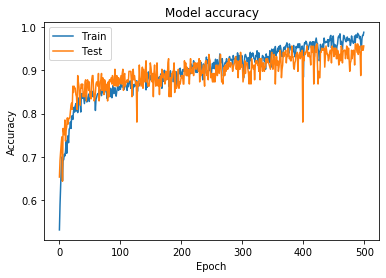

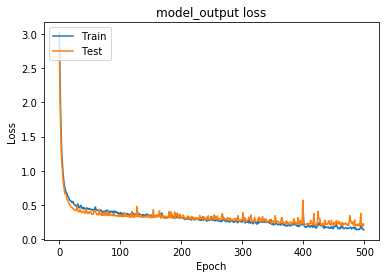

In [18]:
# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [20]:
confusion_matrix(y_test,y_pred1)

array([[ 91,   7],
       [  2, 105]], dtype=int64)

In [21]:
precision_score(y_test,y_pred1)

0.9375

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred1)

0.9560975609756097

In [24]:
model.save("Classifier3.h5")